In [80]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [81]:
# import rpy2
# from rpy2.robjects import pandas2ri
# pandas2ri.activate

In [82]:
# %load_ext rpy2.ipython

In [83]:
%%capture
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

In [84]:
%%capture
adata = sc.read_h5ad('./output/processed_combined_data_from_raw.h5ad')

In [85]:
%%capture
sc.tl.leiden(adata, resolution=0.7)

running Leiden clustering
    finished: found 48 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:44)


In [86]:
%%capture
# Find marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:35)


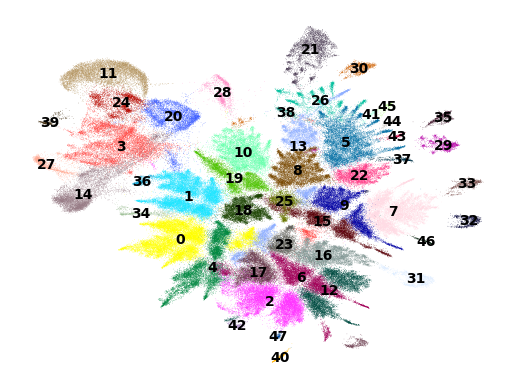

In [87]:
# Plot UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False)

In [88]:
markers_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
print(markers_df)


         0         1       2       3         4         5       6       7  \
0    Cmss1     Cmss1  Hbb-bt  Malat1       Mt3  AY036118  Hbb-bt     Ttr   
1  Gm42418       Mt3  Hba-a2   Auts2    Hba-a1   Gm42418  Hba-a1  Tuba1a   
2   Hba-a1   Gm42418  Hba-a1    Nfib     Fabp7    Tmsb4x  Tuba1a   Stmn1   
3    Fabp7     Fabp7  Hbb-bs    Nfia   Gm42418      Tpt1  Tmsb10  Tmsb10   
4      Mt3       Dbi  Tuba1a   Epha5       Dbi     Rps29   Stmn1  Eef1a1   
5      Dbi    Camk1d  Tmsb10     Dcc      Cst3    Tuba1a  Eef1a1    Tpt1   
6   Camk1d      Cst3   Stmn1   Tenm4  AY036118    Eef1a1    Tpt1  Rps15a   
7     Apoe  AY036118  Eef1a1    Sox5      Apoe    Ndufc1     Ubb   Tubb5   
8     Cst3       Ptn   Tubb5   Ptprd       Ptn     Rplp1    Rps7   H3f3a   
9      Ptn      Apoe     Ttr  Setbp1    Tmsb4x    Rps15a  Rps15a    Ptma   

          8       9  ...             38       39      40        41      42  \
0       Mt3  Hba-a2  ...          Auts2     Reln     Ttr    Eif2s2  Hbb-bt   
1   Gm4

# Annotate cell types based extracted marker genes from supplementary data

In [89]:
cell_type_markers = {
    'Neural Progenitor Cells': ['Sox2', 'Eomes'],  # Eomes is also known as Tbr2
    'Neurons': ['Tbr1', 'Satb2', 'Neurod6', 'Dcx', 'Cux2', 'Sema3a', 'Syn3', 'Nfasc', 'Epha5'],
    'Oligodendrocytes': ['Sox10'],
    'Astrocytes': ['Sox9'],
    'Radial Glial Cells': ['Sox2'],
    'Deep Layer Excitatory Neurons': ['Tbr1'],
    'Upper Layer Excitatory Neurons': ['Satb2'],
    'Endothelial Cells': ['Pecam1'],  # Cd31 is also known as Pecam1
    'Erythrocytes': ['Gypa', 'Tfrc']  # Ter119 is mouse-specific. Cd71 is also known as Tfrc
}

In [90]:
def score_cell_types(adata, cell_type_markers):
    for cell_type, markers in cell_type_markers.items():
        # Check which markers are present in the dataset
        present_markers = [marker for marker in markers if marker in adata.var_names]
        print(present_markers)
        
        if len(present_markers) > 0:
            sc.tl.score_genes(adata, present_markers, score_name=f'{cell_type}_score')
        else:
            print(f"Warning: No markers found for {cell_type}")

In [91]:
adata.obs.head()

,origin,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,gene_UMI_ratio,log1p_gene_UMI_ratio,n_genes,n_counts,leiden
AAACAGCCAACCCTCC-1,EMBRYO,CRE_NEGATIVE,346,5.849325,478.0,6.171700,29.0,3.401197,6.066946,94.0,4.553877,19.665272,0.723849,0.544560,346,478.0,7
AAACAGCCAACCTAAT-1,EMBRYO,CRE_NEGATIVE,461,6.135565,631.0,6.448889,16.0,2.833213,2.535658,135.0,4.912655,21.394611,0.730586,0.548460,461,631.0,16
AAACAGCCAAGCCACT-1,EMBRYO,CRE_NEGATIVE,305,5.723585,426.0,6.056784,4.0,1.609438,0.938967,122.0,4.812184,28.638496,0.715962,0.539974,305,426.0,17
AAACAGCCAAGGTCCT-1,EMBRYO,CRE_NEGATIVE,389,5.966147,531.0,6.276643,21.0,3.091043,3.954802,130.0,4.875197,24.482109,0.732580,0.549612,389,531.0,17
AAACAGCCAAGTCGCT-1,EMBRYO,CRE_NEGATIVE,293,5.683580,406.0,6.008813,11.0,2.484907,2.709360,117.0,4.770685,28.817734,0.721675,0.543298,293,406.0,22


In [92]:
%%capture
# Score cell types
score_cell_types(adata, cell_type_markers)

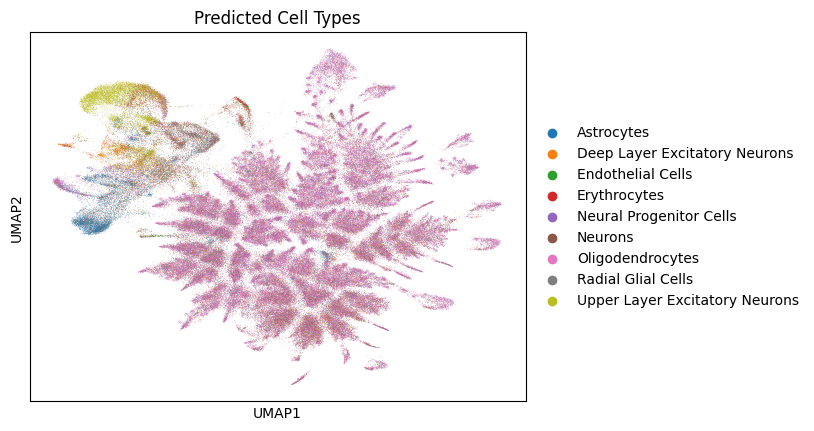

In [93]:
# Identify the cell type with the highest score for each cell
cell_type_scores = [key for key in adata.obs.keys() if key.endswith('_score')]
adata.obs['predicted_cell_type'] = adata.obs[cell_type_scores].idxmax(axis=1).str.replace('_score', '')

# Visualize the results
sc.pl.umap(adata, color='predicted_cell_type', legend_loc='right margin', title='Predicted Cell Types')


In [94]:
# Save the annotated data
adata.write('./output/annotated_data_annotation_by_markers.h5ad')

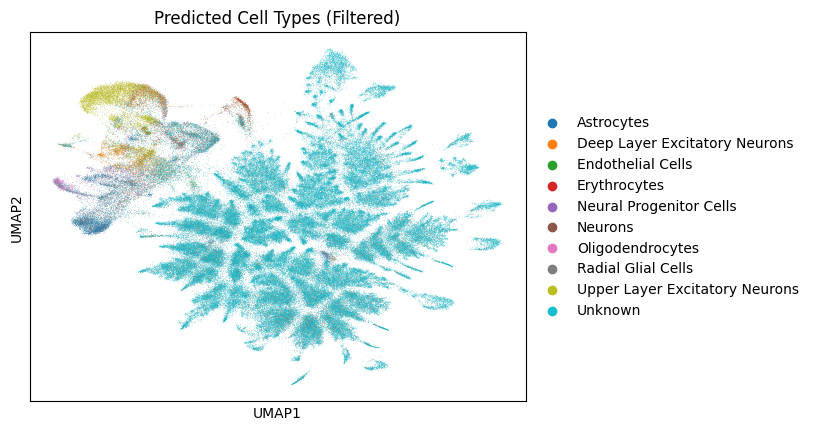

In [95]:
# Optional: to refine the annotations further, you can set a threshold
score_threshold = 0.5  # Adjust this threshold as needed

# Check if 'Unknown' is already a category
if 'Unknown' not in adata.obs['predicted_cell_type'].cat.categories:
    # Add 'Unknown' to the categories of 'predicted_cell_type'
    adata.obs['predicted_cell_type'] = adata.obs['predicted_cell_type'].cat.add_categories(['Unknown'])

# Create a new column for filtered predictions
adata.obs['predicted_cell_type_filtered'] = adata.obs['predicted_cell_type'].copy()

for cell_type in cell_type_markers.keys():
    mask = (adata.obs[f'{cell_type}_score'] < score_threshold) & (adata.obs['predicted_cell_type'] == cell_type)
    adata.obs.loc[mask, 'predicted_cell_type_filtered'] = 'Unknown'

# Visualize the refined results
sc.pl.umap(adata, color='predicted_cell_type_filtered', legend_loc='right margin', title='Predicted Cell Types (Filtered)')

In [96]:
# Print summary of cell type annotations
print(adata.obs['predicted_cell_type'].value_counts())
print(adata.obs['predicted_cell_type_filtered'].value_counts())

predicted_cell_type
Oligodendrocytes                  104462
Neurons                            40342
Neural Progenitor Cells            16170
Astrocytes                         15572
Radial Glial Cells                 14266
Upper Layer Excitatory Neurons     13641
Deep Layer Excitatory Neurons      10914
Endothelial Cells                   6838
Erythrocytes                        5978
Unknown                                0
Name: count, dtype: int64
predicted_cell_type_filtered
Unknown                           164498
Upper Layer Excitatory Neurons     13466
Radial Glial Cells                 12862
Astrocytes                         12673
Deep Layer Excitatory Neurons       7682
Erythrocytes                        5313
Neural Progenitor Cells             4892
Neurons                             4059
Oligodendrocytes                    1487
Endothelial Cells                   1251
Name: count, dtype: int64


In [97]:
# Save the annotated data
adata.write('./output/annotated_data_annotation_by_markers_filtered.h5ad')